95% VaR for 30 days: 20.46%


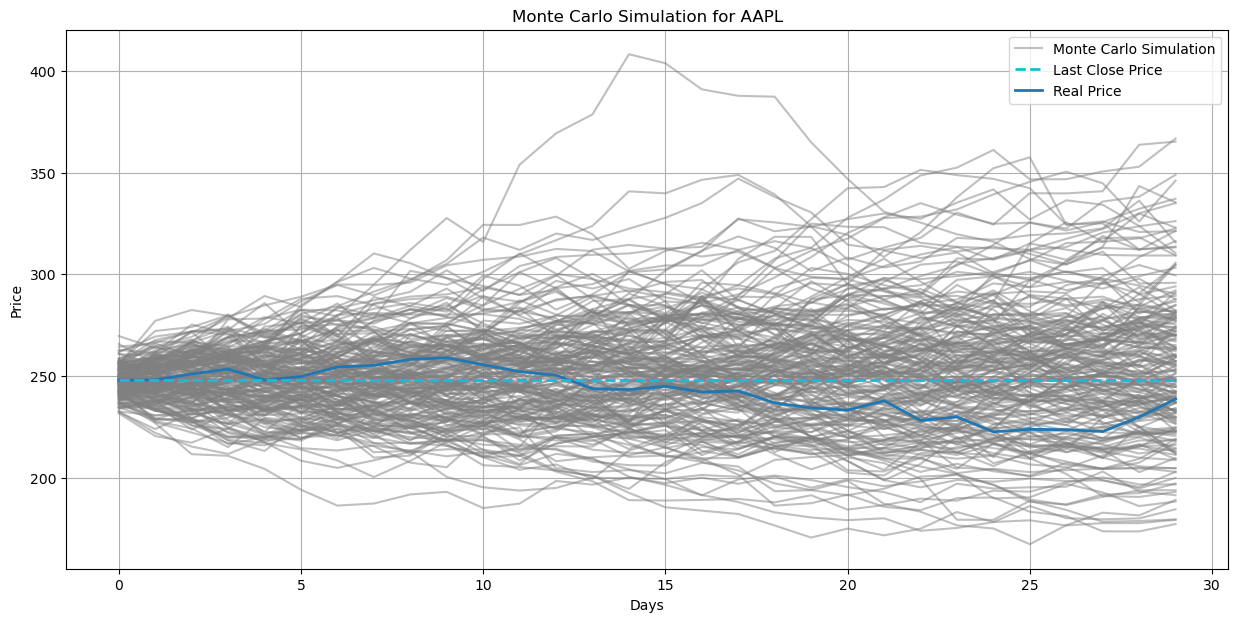

In [17]:
# Monte Carlo simulation and Value at Risk (VaR) calculation
%matplotlib inline
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

number_days = 30
samples = 200
tikr='AAPL'

# Get the stock data
data = yf.Ticker(tikr).history(period="max")

# Calculate daily returns
data['log_ret'] = np.log(data['Close']/data['Close'].shift(1))
stdev = data['log_ret'].std()
mean = data['log_ret'].mean()

# Calculate drift
drift = mean - (np.power(stdev,2)/2)

plt.figure(figsize=(15,7))

final_prices = []
# Generate random walks
for _ in range(samples):
    prev_day = data.Close.iloc[-number_days]  # Start from the last known price
    next_day = np.zeros(number_days)
    for i in range(number_days):
        # Generate daily returns
        random_value = np.random.normal(0, 1)
        # Calculate next price using the correct formula
        next_day[i] = prev_day * np.exp(drift + stdev * random_value)
        prev_day = next_day[i]

    final_prices.append(next_day[-1])
    plt.plot(next_day, color='gray', alpha=0.5)

# Calculate returns relative to initial price
initial_price = data.Close.iloc[-number_days]

# Calculate 95% VaR
var_95 = np.percentile(final_prices, 5)
print(f"95% VaR for {number_days} days: {-(var_95-initial_price)*100/initial_price:.2f}%")

plt.plot(next_day,color='gray', alpha=0.5, label='Monte Carlo Simulation')
plt.plot([data.Close.iloc[-number_days]] * number_days, '--', label='Last Close Price', zorder=1000, linewidth=2, color='tab:cyan')
plt.plot(data.Close.iloc[-number_days:].values, label='Real Price', color='tab:blue', linewidth=2)
plt.title(f'Monte Carlo Simulation for {tikr}')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.savefig('figures/monte_carlo_simulation.png')
plt.show()